<a href="https://colab.research.google.com/github/jeslinpjames/ML_Algorithms_ParallelComputing/blob/main/Feature_Selection_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Class Distribution:
 0    50
1    50
2    50
Name: count, dtype: int64


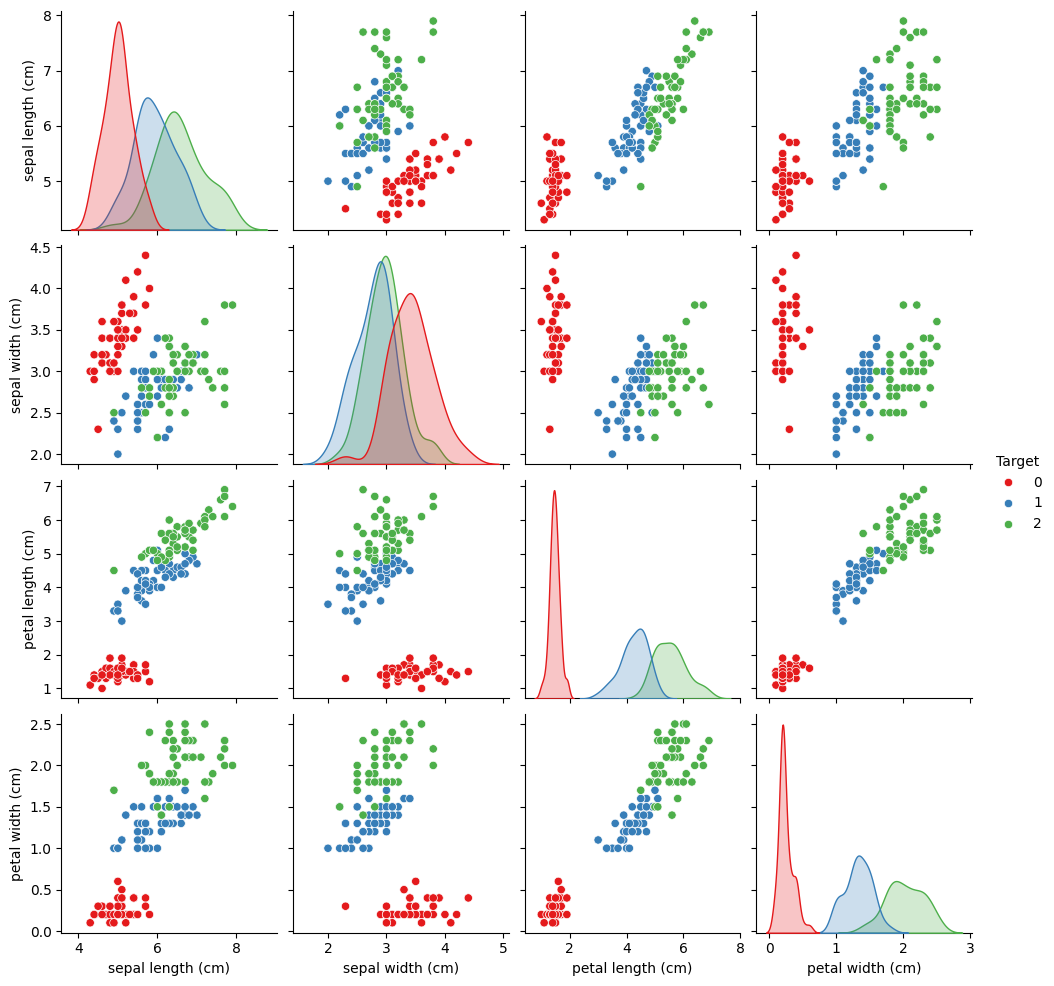

In [2]:
# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target labels

# Display the first few rows
print(X.head())

# Check for missing values
print("\nMissing values:\n", X.isnull().sum())

# Class distribution
print("\nClass Distribution:\n", pd.Series(y).value_counts())

# Visualize feature distributions
sns.pairplot(pd.concat([X, pd.DataFrame(y, columns=['Target'])], axis=1), hue="Target", palette="Set1")
plt.show()


In [3]:
# Apply SelectKBest with ANOVA F-test
select_k = SelectKBest(score_func=f_classif, k=2)  # Select the 2 best features
X_kbest = select_k.fit_transform(X, y)

# Get selected feature indices
selected_features_kbest = X.columns[select_k.get_support()]
print("\nSelected Features (Univariate Feature Selection):\n", selected_features_kbest)



Selected Features (Univariate Feature Selection):
 Index(['petal length (cm)', 'petal width (cm)'], dtype='object')



Feature Importance using Random Forest:
              Feature  Importance
2  petal length (cm)    0.436130
3   petal width (cm)    0.436065
0  sepal length (cm)    0.106128
1   sepal width (cm)    0.021678


<ipython-input-4-bd5b02af27aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette="Blues_r")


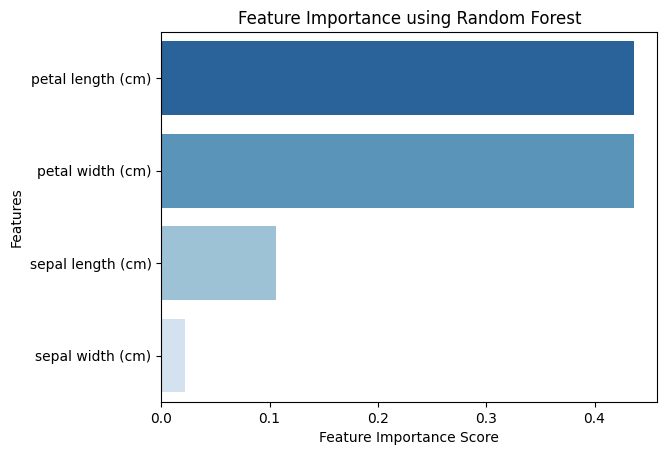

In [4]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance using Random Forest:\n", feature_importances)

# Plot feature importance
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'], palette="Blues_r")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()


In [5]:
# Initialize SVM model for RFE
svm_model = SVC(kernel='linear')

# Apply RFE
rfe = RFE(estimator=svm_model, n_features_to_select=2)  # Select top 2 features
X_rfe = rfe.fit_transform(X, y)

# Get selected feature indices
selected_features_rfe = X.columns[rfe.get_support()]
print("\nSelected Features (RFE with SVM):\n", selected_features_rfe)



Selected Features (RFE with SVM):
 Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model_baseline = LogisticRegression(max_iter=1000)
model_baseline.fit(X_train, y_train)

# Predict and evaluate
y_pred_baseline = model_baseline.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_baseline)
print("\nBaseline Model Accuracy (All Features):", baseline_acc)
print(classification_report(y_test, y_pred_baseline))



Baseline Model Accuracy (All Features): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# Split data using only selected features from RFE
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train Logistic Regression model on selected features
model_rfe = LogisticRegression(max_iter=1000)
model_rfe.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred_rfe = model_rfe.predict(X_test_rfe)
rfe_acc = accuracy_score(y_test, y_pred_rfe)
print("\nModel Accuracy (RFE Selected Features):", rfe_acc)
print(classification_report(y_test, y_pred_rfe))



Model Accuracy (RFE Selected Features): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# Compare accuracy before and after feature selection
print("\nPerformance Comparison:")
print(f"Baseline Model Accuracy (All Features): {baseline_acc:.4f}")
print(f"RFE Selected Features Accuracy: {rfe_acc:.4f}")



Performance Comparison:
Baseline Model Accuracy (All Features): 1.0000
RFE Selected Features Accuracy: 1.0000
